In [130]:
!pip install download

In [131]:

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams["figure.figsize"] = (8,6)
mpl.rcParams["axes.grid"] = False

In [132]:
def parse(x):
  return datetime.strptime(x,"%m/%d/%Y")

In [135]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv",parse_dates = ["Bill_Date"],date_parser = parse)

In [136]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [137]:
bill_df = df.set_index("Bill_Date")

In [138]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [139]:
bill_2018 = bill_df["2016":"2018"][["Billed_amount"]]

In [140]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [141]:
bill_2018["Billed_amount"].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [142]:
bill_2018["ma_rolling_3"] =bill_2018["Billed_amount"].rolling(window=3).mean().shift(1)

In [143]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


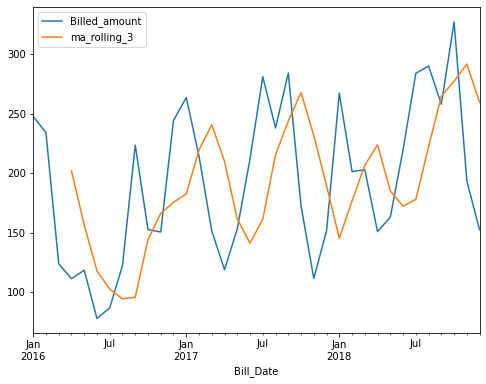

In [144]:
bill_2018.plot();

In [145]:
## Weighted MOVING average


In [148]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [149]:
bill_2018["Billed_amount"].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [150]:
##Exponential Moving Average

In [153]:
bill_2018["Billed_amount"].ewm(span=3,adjust=False, min_periods =0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

In [155]:
bill_2018["ewm_window_3"] = bill_2018["Billed_amount"].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

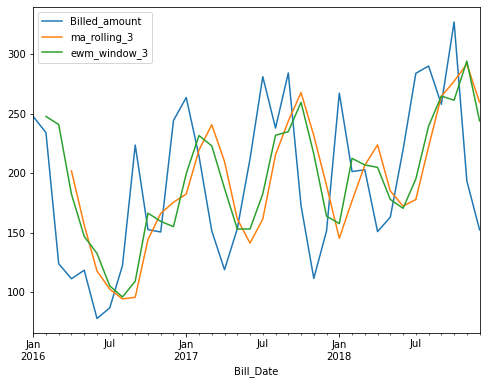

In [157]:
bill_2018.plot()

In [158]:
### EXPONENTIAL SMOOTHING

In [159]:
bill_2018["Billed_amount"].ewm(alpha=0.7,adjust = False, min_periods = 3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
2018-01-01    231.413594
2018-02-01    210.369078
2018-03-01    205.147723
2018-04-01    167.146317
2018-05-01    164.292895
2018-06-01    203.119869
2018-07-01    259.721961
2018-08-01    281.021588
2018-09-01    264.878476
2018-10-01    308.496543
2018-11-01    227.991963
2018-12-01    175.035589
Name: Billed_amount, dtype: float64

In [160]:
bill_2018["esm_win_3_7"] = bill_2018["Billed_amount"].ewm(alpha=0.7,adjust = False, min_periods = 3).mean().shift(1)

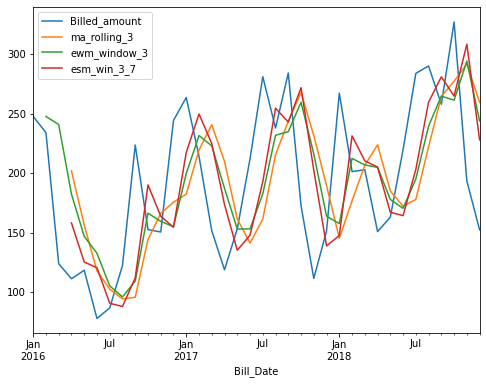

In [161]:
bill_2018.plot()

In [162]:
bill_2018

,Billed_amount,ma_rolling_3,ewm_window_3,esm_win_3_7
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,247.730000,NaN
2016-03-01,123.85,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,182.385000,158.153800
2016-05-01,118.37,156.393333,146.802500,125.300140
2016-06-01,77.81,117.813333,132.586250,120.449042
2016-07-01,86.67,102.466667,105.198125,90.601713
2016-08-01,122.40,94.283333,95.934063,87.849514
2016-09-01,223.62,95.626667,109.167031,112.034854
